<a href="https://colab.research.google.com/github/gaurisharma360/intensityofepilepsy/blob/main/Intensity_of_Epilepsy_using_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [320]:
#import sklearn
#sklearn.__version__

**Multiple Linear Regression**

In [321]:
#confusion,heatmap not possible because it tells the possibility no clear cut classification(i Think)

In [322]:
data_df=pd.read_csv("/content/Minorv2.csv")

In [323]:
data_df.head()

,"Treatment (0=Placebo, 1=Progabide)",Age,Difference in frequencies,Intensity of disease
0,0,31,0.375,4
1,0,30,0.375,4
2,0,25,0.625,4
3,0,36,0.625,4
4,0,22,-1.375,2


In [324]:

x=data_df.drop([('Intensity of disease')],axis=1).values
y=data_df['Intensity of disease'].values

In [325]:
print(x)

[[ 0.    31.     0.375]
 [ 0.    30.     0.375]
 [ 0.    25.     0.625]
 [ 0.    36.     0.625]
 [ 0.    22.    -1.375]
 [ 0.    29.    -0.625]
 [ 0.    31.     0.   ]
 [ 0.    36.     5.375]
 [ 0.    37.    -0.125]
 [ 0.    28.     2.875]
 [ 0.    36.     1.75 ]
 [ 0.    24.    -0.25 ]
 [ 0.    28.    -0.25 ]
 [ 0.    36.     0.   ]
 [ 0.    26.    -3.5  ]
 [ 0.    26.    -4.25 ]
 [ 0.    28.    -1.5  ]
 [ 0.    31.     1.5  ]
 [ 0.    32.    -0.375]
 [ 0.    21.    -0.5  ]
 [ 0.    29.     0.25 ]
 [ 0.    21.     0.625]
 [ 0.    32.    -0.5  ]
 [ 0.    25.     0.25 ]
 [ 0.    30.    11.   ]
 [ 0.    40.    -0.375]
 [ 0.    19.     0.   ]
 [ 0.    22.     0.75 ]
 [ 1.    18.    -4.25 ]
 [ 1.    32.    -1.25 ]
 [ 1.    20.    -1.5  ]
 [ 1.    20.     0.375]
 [ 1.    18.     0.   ]
 [ 1.    24.    -1.625]
 [ 1.    30.     5.375]
 [ 1.    35.     0.75 ]
 [ 1.    57.    -0.125]
 [ 1.    20.    -5.375]
 [ 1.    22.    -1.5  ]
 [ 1.    28.    -0.375]
 [ 1.    23.    -2.   ]
 [ 1.    40.    

In [326]:
print(y)

[4 4 4 4 2 3 4 6 3 5 5 3 3 4 1 1 2 5 3 3 4 4 3 4 7 3 4 4 6 2 2 4 4 2 6 3 3
 1 2 3 2 3 5 2 4 4 3 3 7 2 2 2 4 2 3 6 2 2 3]


In [327]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [328]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [329]:
y_pred=ml.predict(x_test)
print(y_pred)

[3.64897148 3.34576147 4.74408632 3.5764498  3.19162532 2.87289022
 2.76485826 3.49676603 2.86662878 3.44693154 2.88065276 3.75700343
 3.3485911  3.22803626 3.54750118 3.97396801 3.5406393  3.0789624 ]


In [330]:
ml.predict([[0,31,0.375]])

array([3.64897148])

In [331]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
errors

0.48577360870587355

In [427]:
from sklearn.metrics import r2_score
m1=r2_score(y_test,y_pred)
print(m1)

0.5687927418610875


In [333]:
ms1=mean_squared_error(y_test,y_pred)
rms1 = sqrt(ms1)

print("Mean Squared Error is",ms1)
print("Root Mean Squared Error is",rms1)

Mean Squared Error is 0.48577360870587355
Root Mean Squared Error is 0.6969746112347806


Text(0.5, 1.0, 'Actual vs Predicted in Multiple Linear Regression')

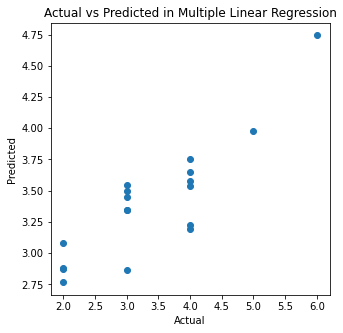

In [334]:

plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted in Multiple Linear Regression')

In [335]:
#cannot be performed here

#print(classification_report(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))

**Multinomial Logistic Regression**

In [336]:
x_train

array([[ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1.   , 21.   , -1.25 ],
       [ 0.   , 30.   ,  0.375],
       [ 0.   , 21.   ,  0.625],
       [ 0.   , 25.   ,  0.625],
       [ 1.   , 26.   , -0.5  ],
       [ 1.   , 28.   , -0.375],
       [ 1.   , 35.   ,  0.75 ],
       [ 0.   , 25.   ,  0.25 ],
       [ 1.   , 22.   , 18.875],
       [ 0

In [337]:
y_train

array([3, 3, 2, 2, 4, 6, 1, 5, 4, 4, 2, 7, 2, 2, 3, 3, 4, 4, 2, 1, 2, 2,
       4, 4, 4, 3, 3, 3, 4, 7, 5, 3, 3, 3, 4, 6, 5, 1, 6, 2, 2])

In [338]:
x_test

array([[ 0.   , 31.   ,  0.375],
       [ 0.   , 29.   , -0.625],
       [ 1.   , 30.   ,  5.375],
       [ 0.   , 36.   ,  0.   ],
       [ 1.   , 25.   ,  0.125],
       [ 1.   , 41.   , -1.375],
       [ 1.   , 36.   , -1.625],
       [ 0.   , 40.   , -0.375],
       [ 1.   , 25.   , -1.   ],
       [ 0.   , 28.   , -0.25 ],
       [ 1.   , 32.   , -1.125],
       [ 0.   , 36.   ,  0.625],
       [ 1.   , 57.   , -0.125],
       [ 1.   , 20.   ,  0.375],
       [ 0.   , 37.   , -0.125],
       [ 0.   , 31.   ,  1.5  ],
       [ 0.   , 31.   ,  0.   ],
       [ 0.   , 22.   , -1.375]])

In [339]:
y_test

array([4, 3, 6, 4, 4, 2, 2, 3, 3, 3, 2, 4, 3, 4, 3, 5, 4, 2])

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [341]:
lr=LogisticRegression(multi_class="multinomial",solver="lbfgs",random_state=42)

In [342]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial', random_state=42)

In [343]:
y_predlr=lr.predict(x_test)

In [344]:
y_predproblr=lr.predict_proba(x_test)

In [345]:
print(y_predproblr)

[[3.75331324e-03 8.81512540e-02 4.14601526e-01 2.80372195e-01
  1.47347392e-01 6.47410275e-02 1.03329197e-03]
 [2.18735583e-02 1.84438765e-01 4.20565073e-01 2.54894104e-01
  7.80495929e-02 3.97774827e-02 4.01423965e-04]
 [9.82305124e-08 1.21170650e-03 2.70510383e-02 2.21981899e-01
  2.07746740e-01 4.19827978e-01 1.22180540e-01]
 [3.77830218e-03 8.92927277e-02 6.05971397e-01 1.20246476e-01
  1.45557367e-01 3.49267999e-02 2.26930559e-04]
 [3.03872263e-03 2.51409804e-01 2.30966163e-01 3.43268385e-01
  5.08120352e-02 1.18948205e-01 1.55668516e-03]
 [4.06289658e-03 2.62670715e-01 6.70993235e-01 1.68608841e-02
  3.41474849e-02 1.12580753e-02 6.70897500e-06]
 [1.08504928e-02 4.00059631e-01 5.17526259e-01 3.19862804e-02
  2.51398273e-02 1.44239720e-02 1.35376118e-05]
 [3.71617793e-03 8.25728142e-02 7.23616073e-01 5.17782805e-02
  1.20544072e-01 1.77193992e-02 5.31827101e-05]
 [1.52688654e-02 4.64886659e-01 2.42792848e-01 2.00638808e-01
  2.42684373e-02 5.18395757e-02 3.04806988e-04]
 [1.345349

In [346]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_predlr))  
m2=metrics.accuracy_score(y_test, y_predlr)

Accuracy Score: 0.4444444444444444


In [347]:
r2predlr=r2_score(y_test,y_predlr)
r2predlr

0.35890410958904095

In [348]:
ms2=mean_squared_error(y_test,y_predlr)
rms2 = sqrt(ms2)
print("Mean Squared Error is",ms2)
print("Root Mean Squared Error is",rms2)

Mean Squared Error is 0.7222222222222222
Root Mean Squared Error is 0.8498365855987975


In [349]:
class_report=classification_report(y_test, y_predlr)
print(class_report)
cm2=confusion_matrix(y_test,y_predlr)
print(cm2)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.42      0.83      0.56         6
           4       0.50      0.33      0.40         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.44        18
   macro avg       0.38      0.43      0.39        18
weighted avg       0.36      0.44      0.37        18

[[0 3 1 0 0]
 [1 5 0 0 0]
 [0 4 2 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Actual vs Predicted in Multinomial Logistic Regression')

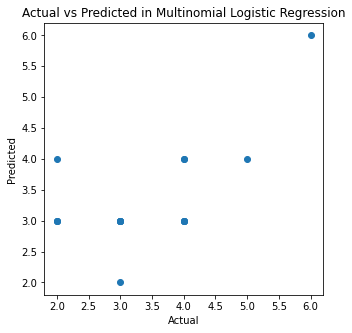

In [350]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_predlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted in Multinomial Logistic Regression')

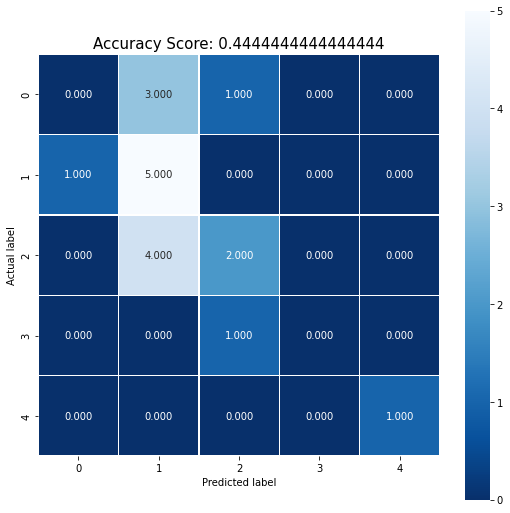

In [351]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(m2)
plt.title(all_sample_title, size = 15);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


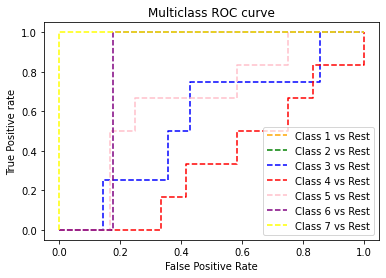

In [352]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score




# fit model
clf = lr
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 6 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [353]:
#y_pred_proba = lr.predict_proba(x_test)[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
#plt.show()

In [354]:
#report_with_auc = class_report(y_test, y_predlr, y_predproblr)

#print(report_with_auc)

In [355]:
#applying standardisation
#scaler=StandardScaler()

In [356]:
#x_train_s=scaler.fit_transform(x_train)
#x_test_s=scaler.transform(x_test)

In [357]:
#lr.fit(x_train,y_train)

In [358]:
#y_predlr2=lr.predict(x_test_s)

In [359]:
#lr.score(x_test_s,y_test)

**Naive Bayes**

In [360]:
x_train

array([[ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1.   , 21.   , -1.25 ],
       [ 0.   , 30.   ,  0.375],
       [ 0.   , 21.   ,  0.625],
       [ 0.   , 25.   ,  0.625],
       [ 1.   , 26.   , -0.5  ],
       [ 1.   , 28.   , -0.375],
       [ 1.   , 35.   ,  0.75 ],
       [ 0.   , 25.   ,  0.25 ],
       [ 1.   , 22.   , 18.875],
       [ 0

In [361]:
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB()

In [362]:
nv=modelnb.fit(x_train,y_train)

In [363]:
y_nv=nv.predict(x_test)

In [364]:
modelnb.score(x_test,y_test)

0.7222222222222222

In [365]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_nv))  
m3=metrics.accuracy_score(y_test, y_nv)

Accuracy Score: 0.7222222222222222


In [429]:
r2prednb=r2_score(y_test,y_nv)
r2prednb

0.7534246575342465

In [367]:
ms3=mean_squared_error(y_test,y_nv)
rms3 = sqrt(ms3)
print("Mean Squared Error is",ms3)
print("Root Mean Squared Error is",rms3)

Mean Squared Error is 0.2777777777777778
Root Mean Squared Error is 0.5270462766947299


In [368]:
class_report=classification_report(y_test, y_nv)
print(class_report)
cm3=confusion_matrix(y_test,y_nv)
print(cm3)


              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       0.62      0.83      0.71         6
           4       0.75      0.50      0.60         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.72        18
   macro avg       0.64      0.67      0.64        18
weighted avg       0.69      0.72      0.69        18

[[4 0 0 0 0]
 [1 5 0 0 0]
 [0 3 3 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [369]:
x_test

array([[ 0.   , 31.   ,  0.375],
       [ 0.   , 29.   , -0.625],
       [ 1.   , 30.   ,  5.375],
       [ 0.   , 36.   ,  0.   ],
       [ 1.   , 25.   ,  0.125],
       [ 1.   , 41.   , -1.375],
       [ 1.   , 36.   , -1.625],
       [ 0.   , 40.   , -0.375],
       [ 1.   , 25.   , -1.   ],
       [ 0.   , 28.   , -0.25 ],
       [ 1.   , 32.   , -1.125],
       [ 0.   , 36.   ,  0.625],
       [ 1.   , 57.   , -0.125],
       [ 1.   , 20.   ,  0.375],
       [ 0.   , 37.   , -0.125],
       [ 0.   , 31.   ,  1.5  ],
       [ 0.   , 31.   ,  0.   ],
       [ 0.   , 22.   , -1.375]])

In [370]:
y_test

array([4, 3, 6, 4, 4, 2, 2, 3, 3, 3, 2, 4, 3, 4, 3, 5, 4, 2])

In [371]:
modelnb.predict(x_test)

array([4, 3, 6, 3, 3, 2, 2, 3, 2, 3, 2, 4, 3, 4, 3, 4, 3, 2])

Text(0.5, 1.0, 'Actual vs Predicted using Naive Bayes')

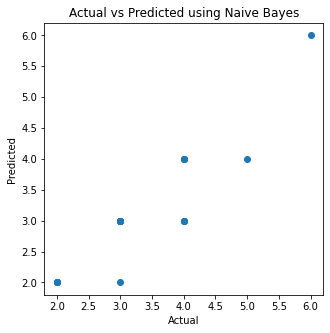

In [372]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_nv)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using Naive Bayes')

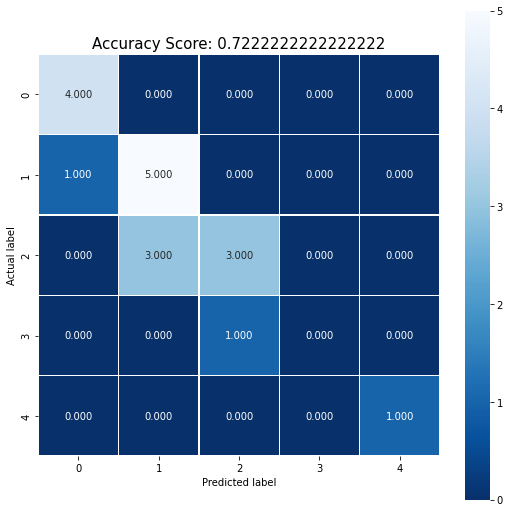

In [373]:
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(m3)
plt.title(all_sample_title, size = 15);

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


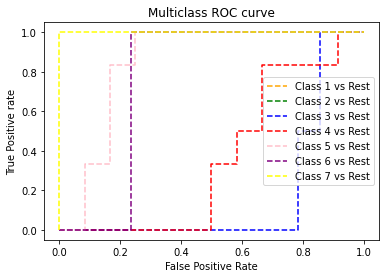

In [374]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score




# fit model
clf = nv
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 6 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

**K-Nearest Neighbours(KNN algorithm)**

In [375]:
#Scaling imp here else 0.33
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_trainsc=scaler.transform(x_train)
x_testsc=scaler.transform(x_test)

In [376]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_trainsc,y_train)

KNeighborsClassifier()

In [377]:
classifier.score(x_testsc,y_test)


0.3333333333333333

In [378]:
y_predknn=classifier.predict(x_testsc)

In [379]:
m4=metrics.accuracy_score(y_test, y_predknn)
m4

0.3333333333333333

In [430]:
#negative beacuse dataset is very small
r2predknn=r2_score(y_test,y_predknn)
r2predknn

-0.5780821917808221

In [381]:
ms4=mean_squared_error(y_test,y_predknn)
rms4 = sqrt(ms4)
print("Mean Squared Error is",ms4)
print("Root Mean Squared Error is",rms4)

Mean Squared Error is 1.7777777777777777
Root Mean Squared Error is 1.3333333333333333


In [382]:

print(classification_report(y_test,y_predknn))
cm4=confusion_matrix(y_test,y_predknn)
print(cm4)

              precision    recall  f1-score   support

           2       0.40      0.50      0.44         4
           3       0.36      0.67      0.47         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.33        18
   macro avg       0.15      0.23      0.18        18
weighted avg       0.21      0.33      0.26        18

[[2 1 1 0 0]
 [1 4 1 0 0]
 [2 4 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Actual vs Predicted using KNN')

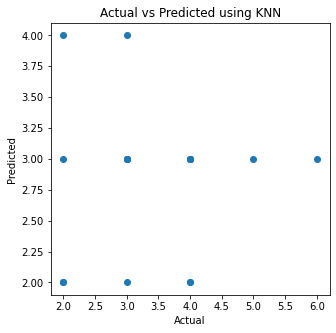

In [383]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_predknn)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using KNN')

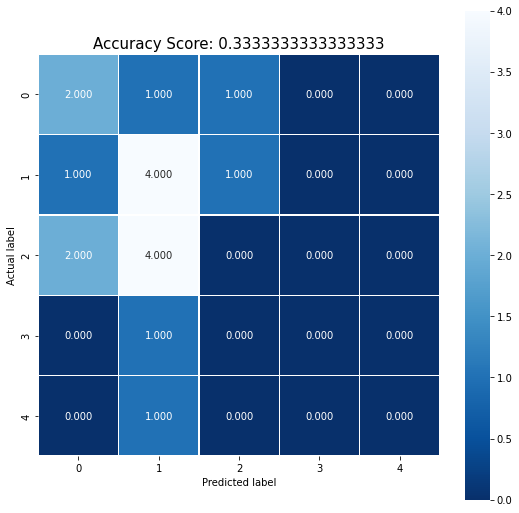

In [384]:
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(m4)
plt.title(all_sample_title, size = 15);

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


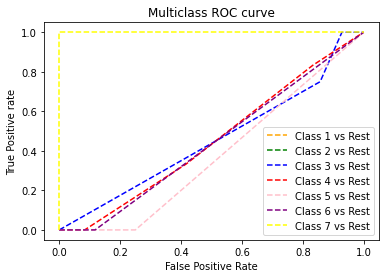

In [385]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score




# fit model
clf = classifier
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 6 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

**Decision Tree**

In [386]:
x_train

array([[ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1.   , 21.   , -1.25 ],
       [ 0.   , 30.   ,  0.375],
       [ 0.   , 21.   ,  0.625],
       [ 0.   , 25.   ,  0.625],
       [ 1.   , 26.   , -0.5  ],
       [ 1.   , 28.   , -0.375],
       [ 1.   , 35.   ,  0.75 ],
       [ 0.   , 25.   ,  0.25 ],
       [ 1.   , 22.   , 18.875],
       [ 0

In [387]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [388]:
#importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [389]:
#creating decision tree function
dt=DecisionTreeClassifier(random_state=42)

In [390]:
#fitting model
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [391]:
#checking training score
dt.score(x_train,y_train)

1.0

In [392]:
#checking testing score
y_preddt=dt.predict(x_test)

In [393]:
from sklearn import metrics
m5=metrics.accuracy_score(y_test,y_preddt)
metrics.accuracy_score(y_test,y_preddt)


0.7777777777777778

In [394]:
ms5=mean_squared_error(y_test,y_preddt)
rms5 = sqrt(ms5)
print("Mean Squared Error is",ms5)
print("Root Mean Squared Error is",rms5)

Mean Squared Error is 0.2222222222222222
Root Mean Squared Error is 0.4714045207910317


In [395]:
r2preddt=r2_score(y_test,y_preddt)
r2preddt

0.8027397260273972

In [396]:
print(classification_report(y_test,y_preddt))
cm5=confusion_matrix(y_test,y_preddt)
print(cm5)

              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       1.00      0.83      0.91         6
           4       0.80      0.67      0.73         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.78        18
   macro avg       0.72      0.70      0.71        18
weighted avg       0.83      0.78      0.80        18

[[4 0 0 0 0]
 [1 5 0 0 0]
 [0 0 4 2 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]


Text(0.5, 1.0, 'Actual vs Predicted using Decision Tree')

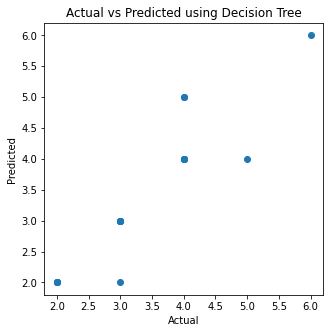

In [397]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_preddt)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using Decision Tree')

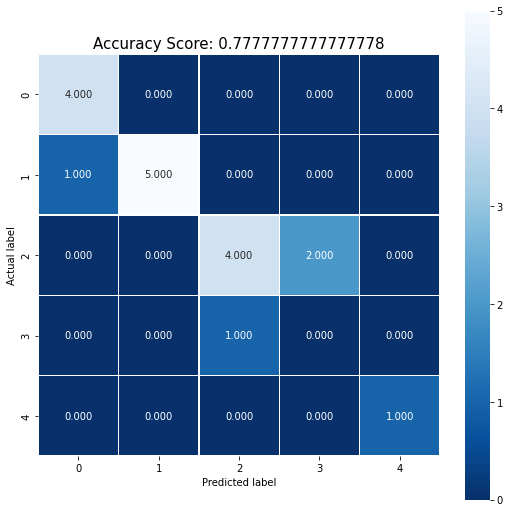

In [398]:
plt.figure(figsize=(9,9))
sns.heatmap(cm5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(m5)
plt.title(all_sample_title, size = 15);

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


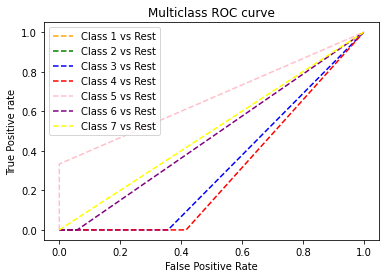

In [399]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score




# fit model
clf = dt
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 6 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

**Random Forest**

In [400]:
x_train

array([[ 1.   , 32.   , -0.125],
       [ 0.   , 21.   , -0.5  ],
       [ 1.   , 20.   , -1.5  ],
       [ 1.   , 25.   , -2.   ],
       [ 1.   , 35.   ,  0.125],
       [ 1.   , 26.   ,  3.625],
       [ 0.   , 26.   , -4.25 ],
       [ 0.   , 28.   ,  2.875],
       [ 0.   , 22.   ,  0.75 ],
       [ 0.   , 19.   ,  0.   ],
       [ 0.   , 28.   , -1.5  ],
       [ 0.   , 30.   , 11.   ],
       [ 1.   , 24.   , -1.625],
       [ 1.   , 21.   , -2.375],
       [ 1.   , 40.   , -0.125],
       [ 0.   , 24.   , -0.25 ],
       [ 1.   , 18.   ,  0.   ],
       [ 1.   , 21.   ,  1.75 ],
       [ 1.   , 23.   , -2.   ],
       [ 1.   , 20.   , -5.375],
       [ 1.   , 32.   , -1.25 ],
       [ 1.   , 21.   , -1.25 ],
       [ 0.   , 30.   ,  0.375],
       [ 0.   , 21.   ,  0.625],
       [ 0.   , 25.   ,  0.625],
       [ 1.   , 26.   , -0.5  ],
       [ 1.   , 28.   , -0.375],
       [ 1.   , 35.   ,  0.75 ],
       [ 0.   , 25.   ,  0.25 ],
       [ 1.   , 22.   , 18.875],
       [ 0

In [401]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [402]:
rf.predict(x_test)

array([4, 3, 6, 3, 4, 2, 2, 3, 2, 3, 2, 4, 3, 4, 3, 4, 4, 2])

In [403]:
y_predrf=rf.predict(x_test)

In [404]:
from sklearn.metrics import accuracy_score,classification_report
m6=accuracy_score(y_test,y_predrf)
accuracy_score(y_test,y_predrf)


0.8333333333333334

In [405]:
ms6=mean_squared_error(y_test,y_predrf)
rms6 = sqrt(ms6)
print("Mean Squared Error is",ms6)
print("Root Mean Squared Error is",rms6)

Mean Squared Error is 0.16666666666666666
Root Mean Squared Error is 0.408248290463863


In [406]:
r2predrf=r2_score(y_test,y_predrf)
r2predrf

0.8520547945205479

In [407]:
mean_squared_error(y_test, y_predrf, squared=True)


0.16666666666666666

In [408]:
print(classification_report(y_test,y_predrf))

cm6=confusion_matrix(y_test,y_predrf)
print(cm6)

              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       0.83      0.83      0.83         6
           4       0.83      0.83      0.83         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.83        18
   macro avg       0.69      0.73      0.71        18
weighted avg       0.79      0.83      0.81        18

[[4 0 0 0 0]
 [1 5 0 0 0]
 [0 1 5 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Actual vs Predicted using Random Forest')

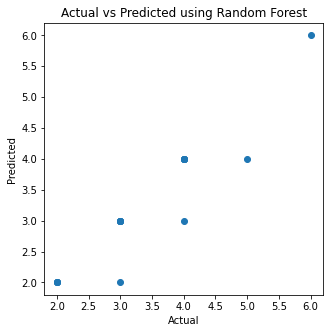

In [409]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_predrf)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using Random Forest')

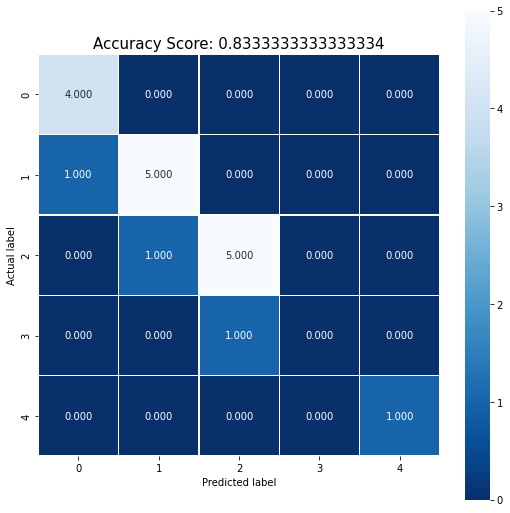

In [410]:
plt.figure(figsize=(9,9))
sns.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(m6)
plt.title(all_sample_title, size = 15);

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


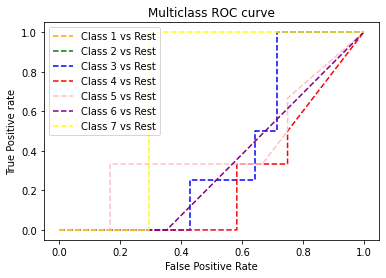

In [411]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score




# fit model
clf = rf
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 6 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

**SGD** 

In [412]:
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
#scaled
scaler = preprocessing.StandardScaler()
sgdx_train = scaler.fit_transform(x_train)
sgdx_test = scaler.transform(x_test)

In [413]:
sgdc=SGDClassifier(max_iter=1000,loss="hinge")
print(sgdc)

SGDClassifier()


In [414]:
sgdc.fit(sgdx_train,y_train)

SGDClassifier()

In [415]:
score = sgdc.score(sgdx_train, y_train)
print("Training score: ", score) 
 



Training score:  0.4878048780487805


In [416]:
sgdypred = sgdc.predict(sgdx_test)

In [417]:
m7=accuracy_score(y_test,sgdypred)
accuracy_score(y_test,sgdypred)

0.3333333333333333

In [418]:
ms7=mean_squared_error(y_test,sgdypred)
rms7 = sqrt(ms7)
print("Mean Squared Error is",ms7)
print("Root Mean Squared Error is",rms7)

Mean Squared Error is 1.6111111111111112
Root Mean Squared Error is 1.2692955176439846


In [419]:
r2predsgd=r2_score(y_test,sgdypred)
r2predsgd

-0.43013698630137

In [420]:
cr = classification_report(y_test, sgdypred)
print(cr)
cm7=confusion_matrix(y_test,sgdypred)
print(cm7)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.33      0.83      0.48         6
           4       0.50      0.17      0.25         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.33        18
   macro avg       0.17      0.20      0.15        18
weighted avg       0.28      0.33      0.24        18

[[0 3 1 0 0]
 [0 5 0 1 0]
 [0 5 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Actual vs Predicted using SGD')

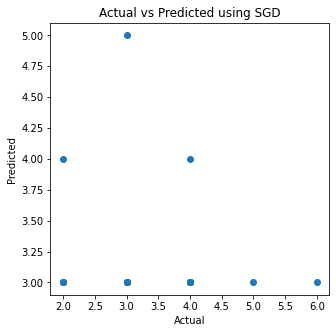

In [421]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,sgdypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted using SGD')

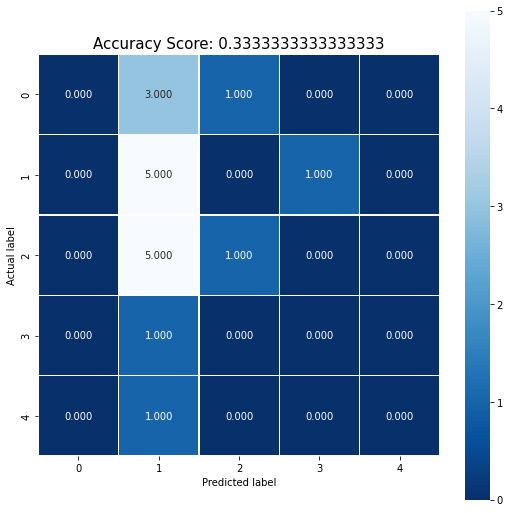

In [422]:
plt.figure(figsize=(9,9))
sns.heatmap(cm7, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(m7)
plt.title(all_sample_title, size = 15);

In [423]:
# multi-class classification
#from sklearn.multiclass import OneVsRestClassifier

#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score




# fit model
#clf = SGDClassifier
#clf.fit(x_train, y_train)
#pred = clf.predict(x_test)
#pred_prob = clf.predict_proba(x_test)

# roc curve for classes
#fpr = {}
#tpr = {}
#thresh ={}

#n_class = 7

#for i in range(n_class):    
   # fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
#plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
#plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 5 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 6 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 7 vs Rest')
#plt.title('Multiclass ROC curve')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive rate')
#plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=300);    

**PLOT**

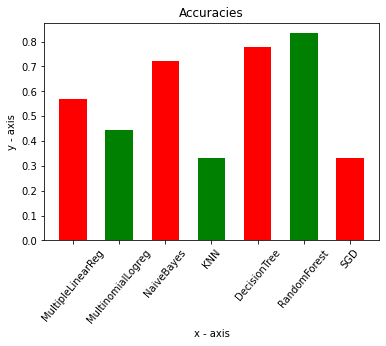

In [428]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7]
  
# heights of bars
height= [m1, m2, m3, m4, m5, m6, m7] 
# labels for bars
tick_label = ['MultipleLinearReg', 'MultinomialLogreg', 'NaiveBayes', 'KNN', 'DecisionTree',"RandomForest","SGD"]
 # function to add value labels
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['red', 'green'])


# naming the x-axis
plt.xlabel('x - axis')
plt.xticks(rotation=50)
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Accuracies')

# function to show the plot
plt.show()

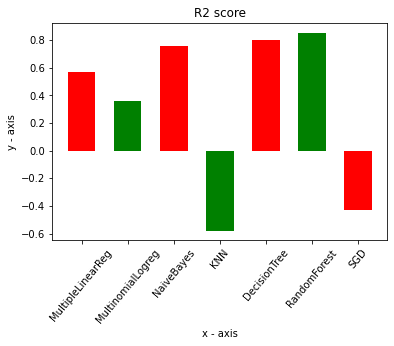

In [432]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7]
  
# heights of bars
height= [m1, r2predlr, r2prednb, r2predknn, r2preddt, r2predrf, r2predsgd] 
# labels for bars
tick_label = ['MultipleLinearReg', 'MultinomialLogreg', 'NaiveBayes', 'KNN', 'DecisionTree',"RandomForest","SGD"]
 # function to add value labels
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['red', 'green'])


# naming the x-axis
plt.xlabel('x - axis')
plt.xticks(rotation=50)
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('R2 score')

# function to show the plot
plt.show()

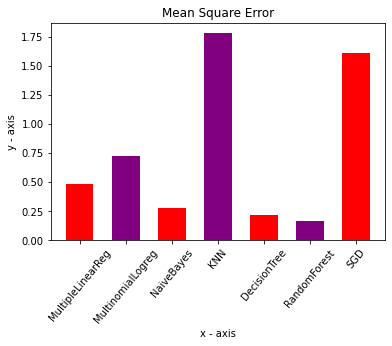

In [425]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7]
  
# heights of bars
height= [ms1, ms2, ms3, ms4, ms5, ms6, ms7] 
# labels for bars
tick_label = ['MultipleLinearReg', 'MultinomialLogreg', 'NaiveBayes', 'KNN', 'DecisionTree',"RandomForest","SGD"]
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['red', 'purple'])


# naming the x-axis
plt.xlabel('x - axis')
plt.xticks(rotation=50)
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title("Mean Square Error")

# function to show the plot
plt.show()

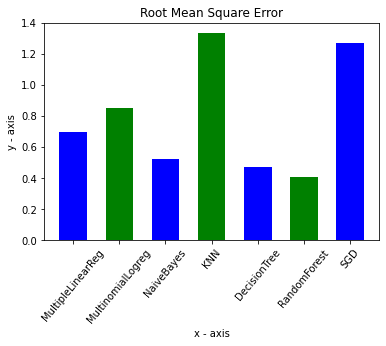

In [426]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7]
  
# heights of bars
height= [rms1, rms2, rms3, rms4, rms5, rms6, rms7] 
# labels for bars
tick_label = ['MultipleLinearReg', 'MultinomialLogreg', 'NaiveBayes', 'KNN', 'DecisionTree',"RandomForest","SGD"]
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['blue', 'green'])


# naming the x-axis
plt.xlabel('x - axis')
plt.xticks(rotation=50)
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title("Root Mean Square Error")

# function to show the plot
plt.show()